# Zomato Data Analysis Project

## Exploratory Data Analysis on Zomato Restaurant Data

### About the Project:
In this project we analyze a dataset from Zomato to understand trends in restaurant ratings, cuisines, restaurant types and average price. This analysis helps in understanding customer preferences and market trends.

## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [5]:
data_file= pd.read_csv("Zomato_data .csv")

## Data Exploration And Cleaning

In [6]:
data_file.head(5)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
data_file.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [9]:
# data cleaning 
def removedivide(value):
    value=str(value).split('/')
    return value[0]
data_file['rate']=data_file['rate'].apply(removedivide)
data_file['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: object

In [10]:
data_file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
data_file.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [12]:
data_file.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## Visualization

In [13]:
data_file.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [14]:
# Palettes list
print(sns.palettes.SEABORN_PALETTES.keys())


dict_keys(['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6'])


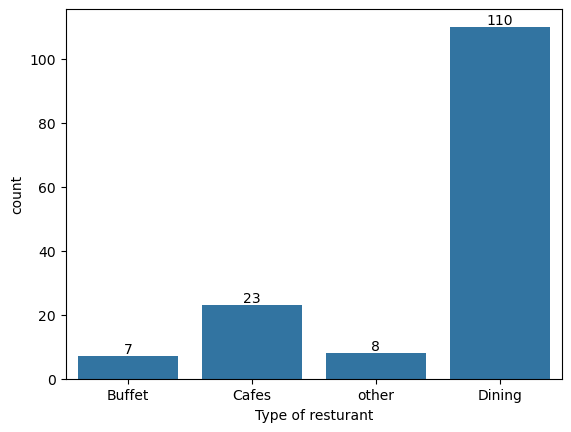

In [15]:
ax = sns.countplot(data=data_file, x='listed_in(type)')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Type of resturant")
plt.show()




### Conclusion: 'Dining' type of resturant are majority on this zomato data.


#### Q. How many votes has each type of restaurant received from customers ?

In [16]:

data_file.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


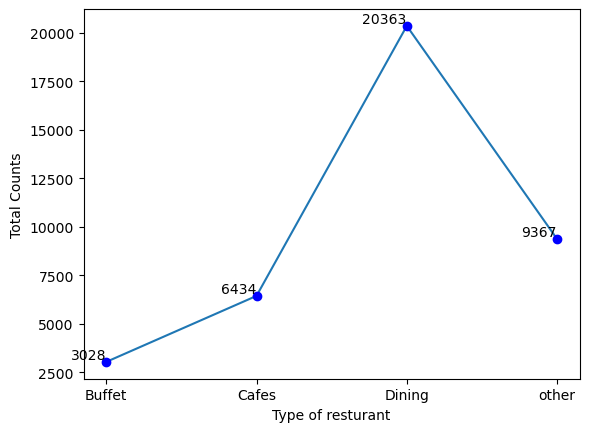

In [17]:
datagroup = data_file.groupby('listed_in(type)')['votes'].sum()
x=datagroup.index
y=datagroup.values
ax=sns.lineplot(x=x,y=y,markers=['o'])
plt.plot(x,y,'o',color='b')
plt.xlabel('Type of resturant')
plt.ylabel("Total Counts")
for i,value in enumerate(y):
    plt.text(x[i],y[i],str(value),ha='right',va='bottom')
plt.show()

### Conclusion: Dining restaurants are the most popular with the highest votes, while buffets are the least preferred type among customers.

#### Q. what are the ratings that the majority of resturants have received ?

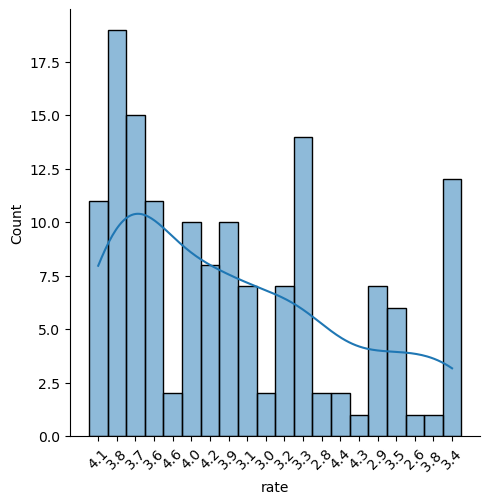

In [18]:
sns.displot(data_file['rate'],bins=5,kde=True)
plt.xticks(rotation=45)
plt.show()

### conclusion: The majority of restaurants have received ratings between 3.0 to 4.0, indicating that most restaurants are rated average to good.

#### Q. Zomato has observed the most couples order most of their food online. What is the average spending on each other ?

In [19]:
data_file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


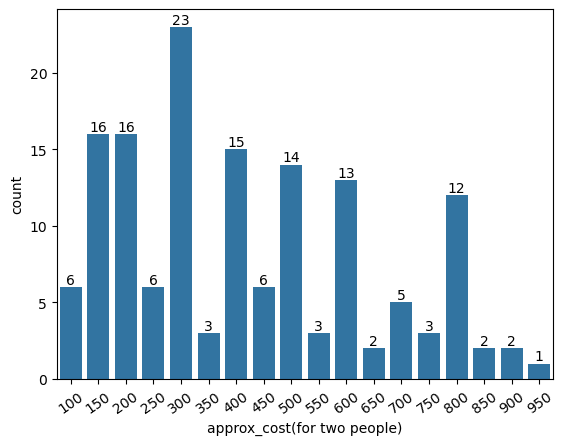

In [20]:

couple=data_file['approx_cost(for two people)']
ax=sns.countplot(x=couple)
plt.xticks(rotation=35)
for value in ax.containers:
    ax.bar_label(value)
plt.show()

### conclusion: Most couples spend around 300 when ordering food online, followed by 150, 200, and 350.

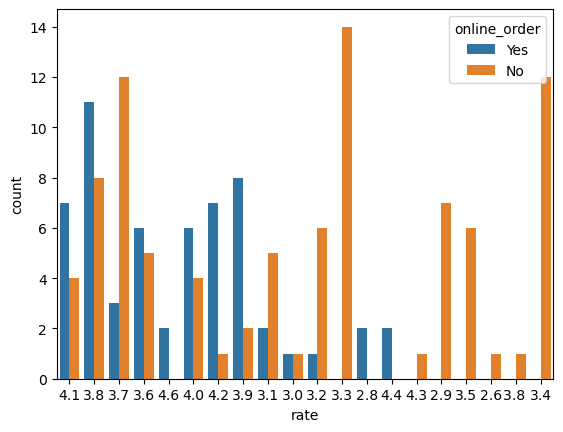

In [21]:
# Which mode has received maximum rating(online/offline)?
sns.countplot(data_file,x='rate',hue='online_order')
plt.show()

### conclusion: Online orders gets the better rating compared to offline orders.

#### Q. Which type of restaurant received more offline orders ?

In [58]:
data_file.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


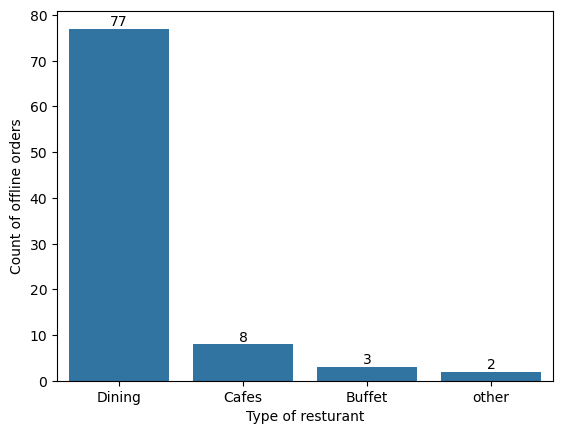

In [59]:
offline_orders = data_file[data_file['online_order']=='No']
r_type=offline_orders['listed_in(type)'].value_counts()
ax= sns.barplot(r_type)
for value in ax.containers:
    ax.bar_label(value)
plt.xlabel("Type of resturant")
plt.ylabel("Count of offline orders")
plt.show()

### Conclusion: Dining type of resturant gets the maximum numbers of offline orders.